## Part1

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Collection

In [29]:
# import data from Jan 01 2010 to June 30 2019
beg = -3468 - 79
end = -79

price = pd.read_csv('price.csv',index_col=['Date'])[beg:end]
date_price = pd.to_datetime(price.index)

price_vol = pd.read_csv('price-volatility.csv',index_col=['Date'])[:end] 
date_price_vol =pd.to_datetime(price_vol.index)

daily_trans = pd.read_csv('daily-transactions.csv',index_col=['Date'])[:-1][beg+10:end+10] 
trans_amount = pd.read_csv('transaction-amount.csv',index_col=['Date'])[beg:end] 

miner_revenue = pd.read_csv('miner-revenue.csv',index_col=['Date'])[beg:end] 
trans_fees = pd.read_csv('transaction-fees.csv',index_col=['Date'])[beg:end] 

LTC_price = pd.read_csv('LTC-USD.csv',index_col=['Date'])[:-1][:end] 
# print(LTC_price.dtypes)
date_LTC_price = pd.to_datetime(LTC_price.index)

chain_value_density = pd.read_csv('chain-value-density.csv',index_col=['Date'])[beg:end]
hash_rate = pd.read_csv('hash-rate.csv',index_col=['Date'])[beg:end] 
inflation = pd.read_csv('inflation.csv',index_col=['Date'])[:end][1:]
date_BTC_inflation = pd.to_datetime(inflation.index)
mkt_cap = pd.read_csv('market-cap.csv',index_col=['Date'])[beg:end] 
trans_size = pd.read_csv('transaction-size.csv',index_col=['Date'])[beg:end]
trans_value =pd.read_csv('transaction-value.csv',index_col=['Date'])[beg:end]

In [30]:
data = pd.concat([price, price_vol, daily_trans, trans_amount, miner_revenue, trans_fees, LTC_price.iloc[:,-2:],chain_value_density, hash_rate, inflation, mkt_cap,trans_size, trans_value], axis=1)
data["price_return"] = np.log(data["Bitcoin Core (BTC) Price"]/data["Bitcoin Core (BTC) Price"].shift(1))
# print(data.head())

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


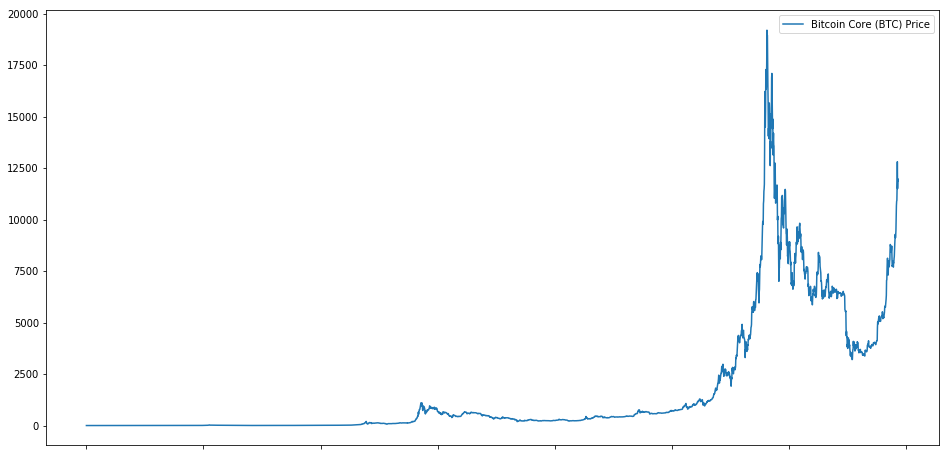

In [31]:
# basic EDA
# plot bitcoin price timeseries
data.plot(y=["Bitcoin Core (BTC) Price"], figsize=(16,8))

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


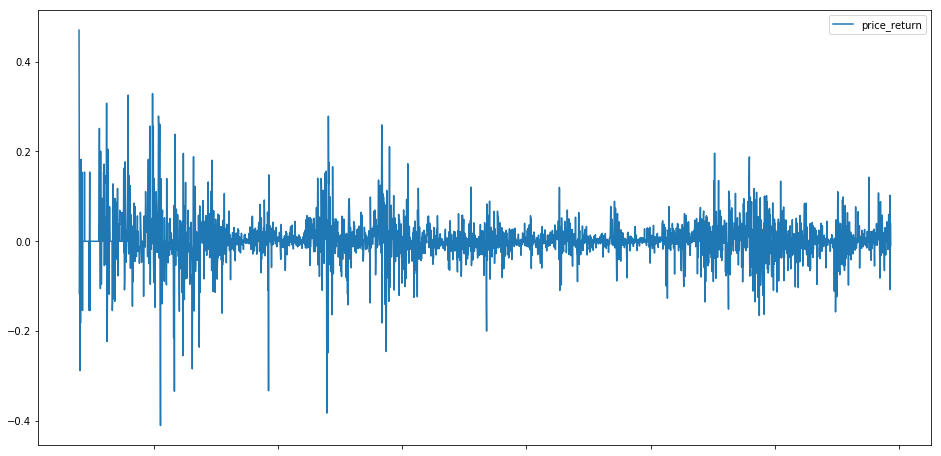

In [32]:
# plot price return
data.plot(y=["price_return"], figsize=(16,8))

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


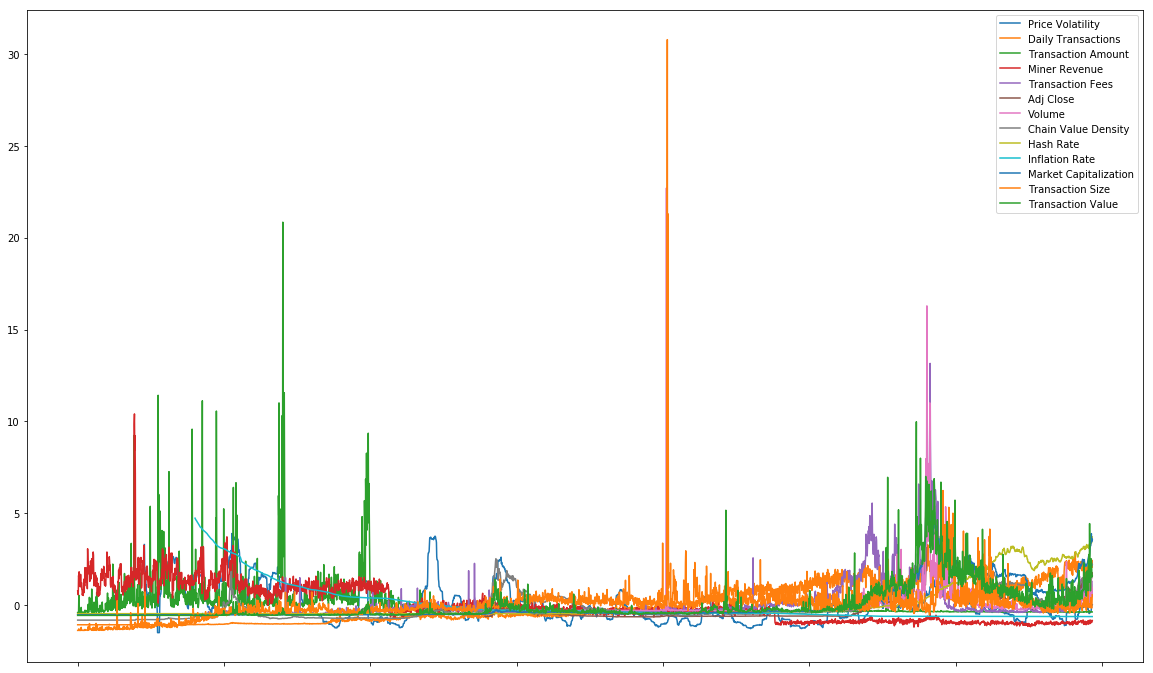

In [33]:
norm_feat = data.iloc[:,1:-1] = (data.iloc[:,1:-1]-data.iloc[:,1:-1].mean())/data.iloc[:,1:-1].std()
norm_feat.plot(y=data.columns[1:-1], figsize=(20,12))

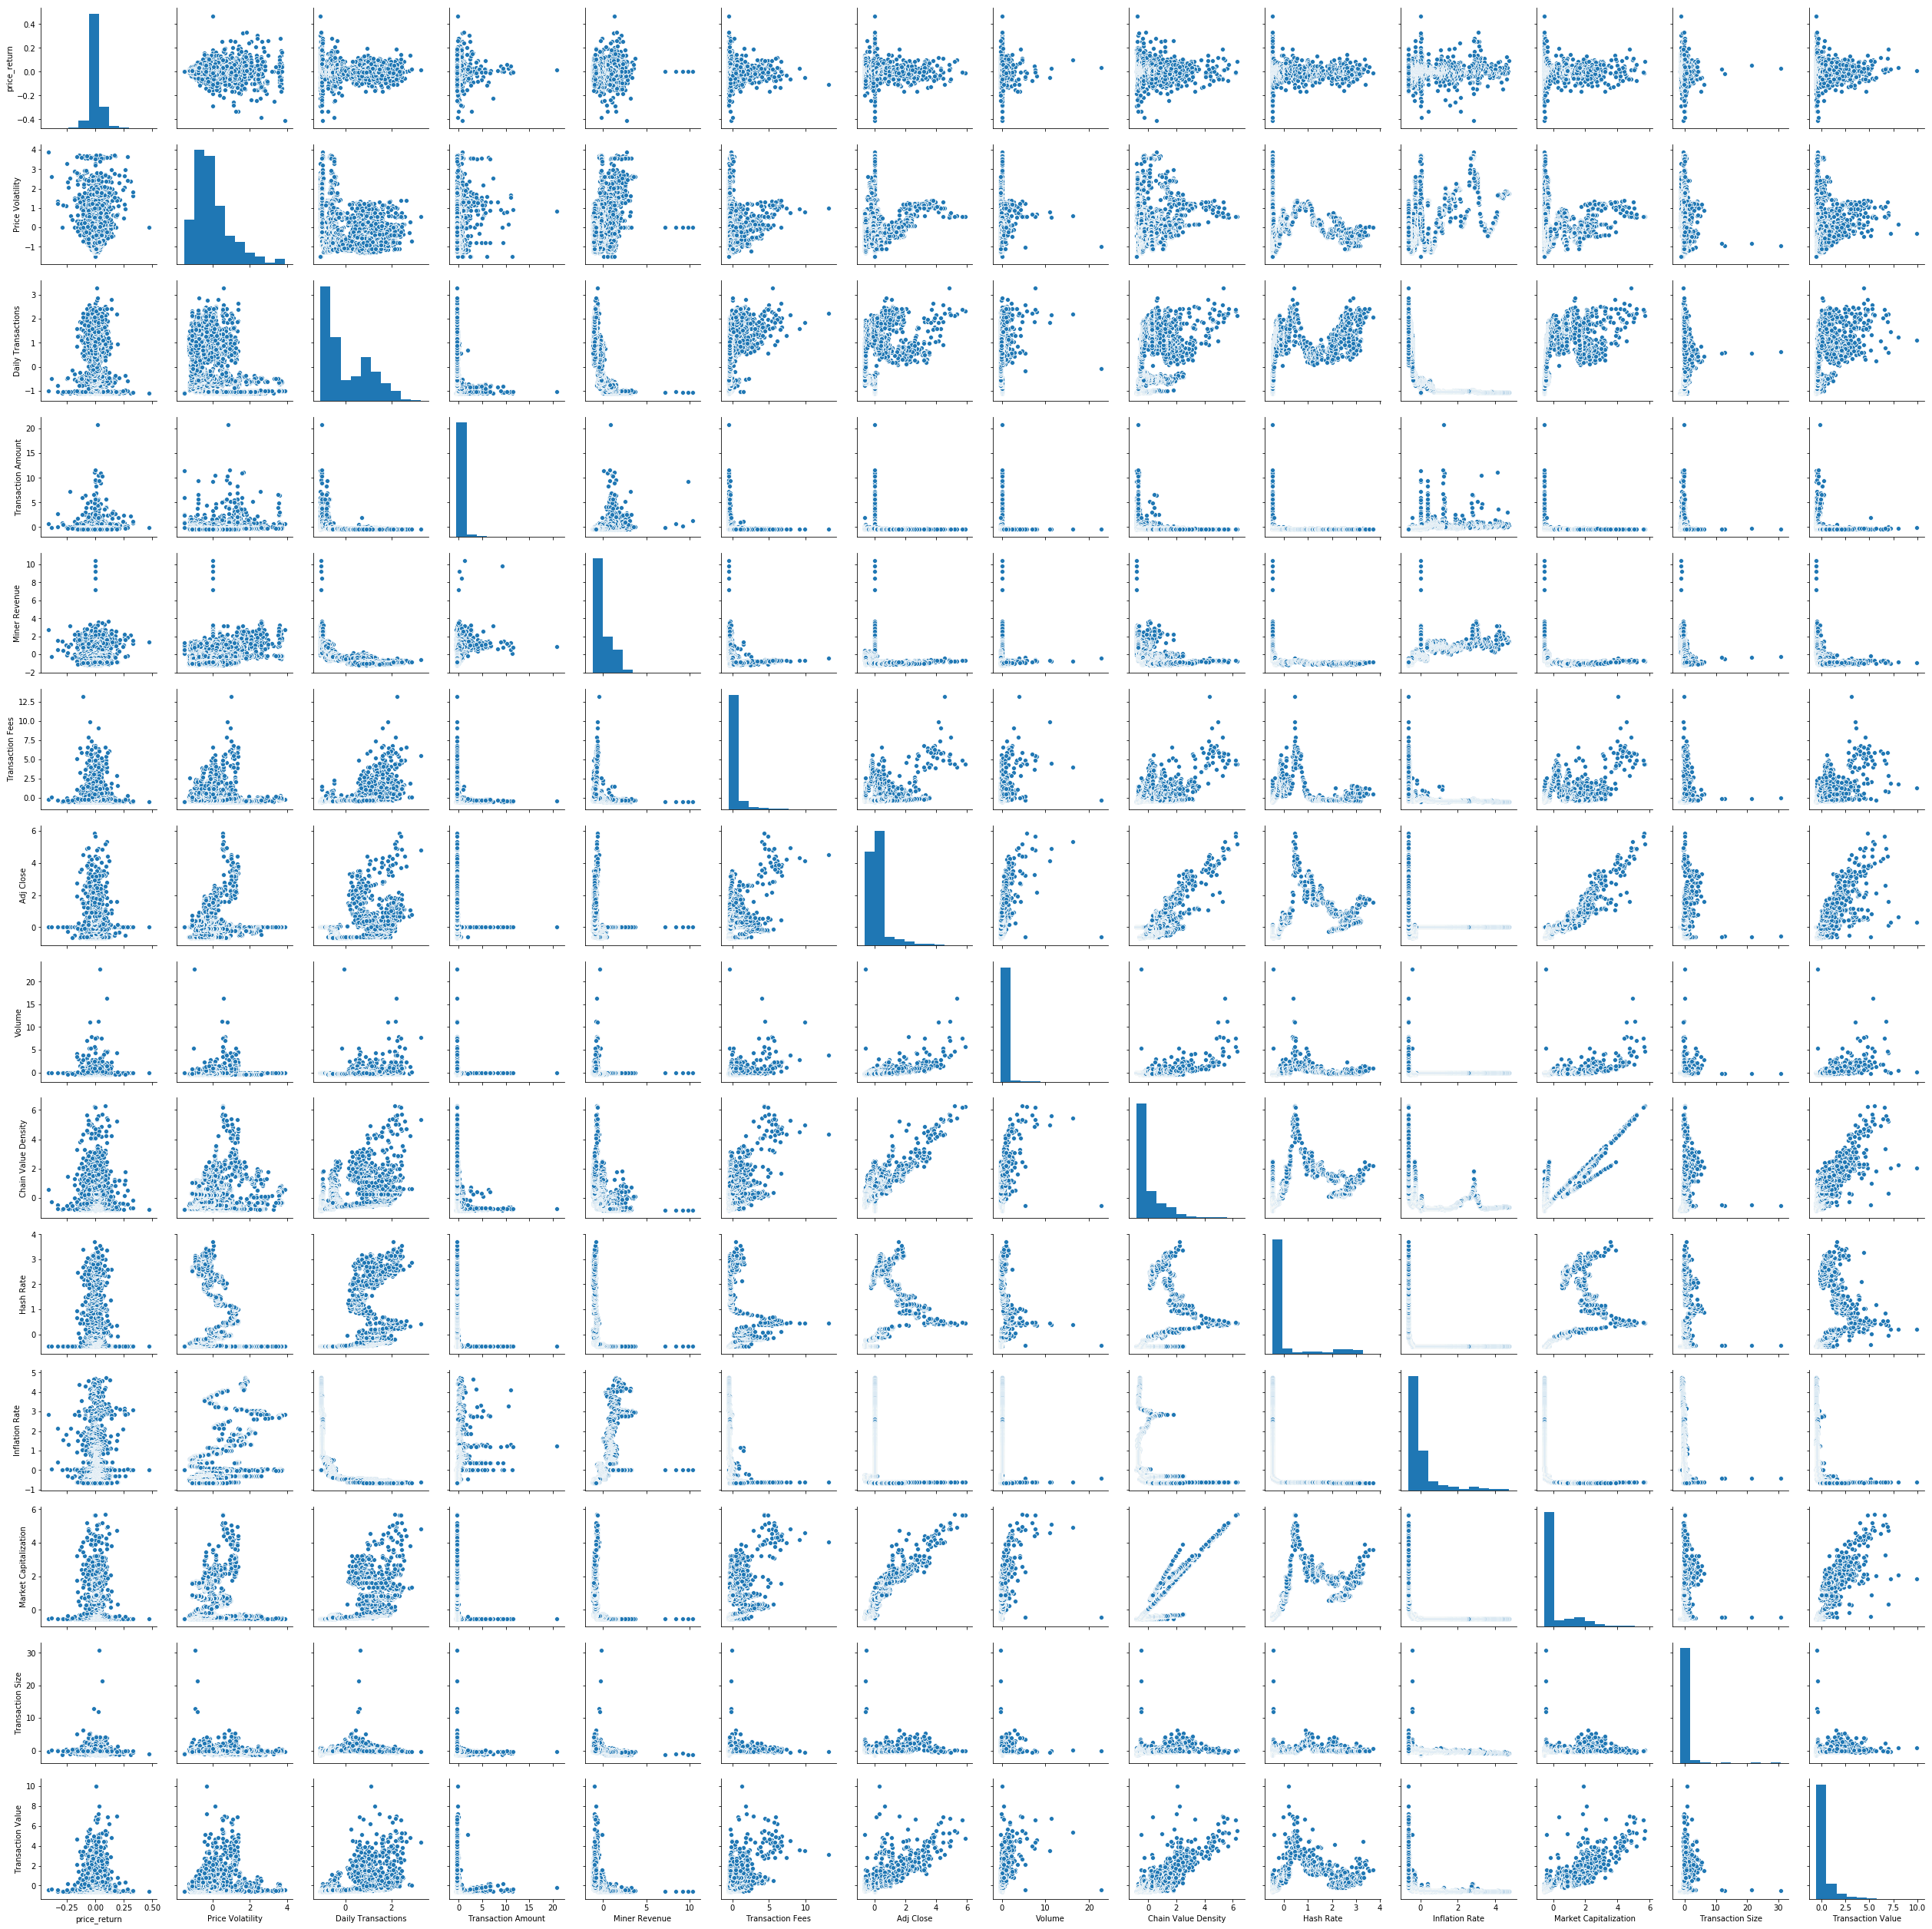

In [22]:
import seaborn as sns
data_normfeat = pd.concat([data["price_return"], norm_feat], axis=1)
data_normfeat = data_normfeat.fillna(0)
data_normfeat=data_normfeat.replace(np.inf,0)
data_normfeat=data_normfeat.replace(-np.inf,0)

#print(data_normfeat.head())
sns.pairplot(data_normfeat)

In [36]:
print("correlation matrix:")
round(data_normfeat.iloc[:,1:].corr(),3)

correlation matrix:


,Price Volatility,Daily Transactions,Transaction Amount,Miner Revenue,Transaction Fees,Adj Close,Volume,Chain Value Density,Hash Rate,Inflation Rate,Market Capitalization,Transaction Size,Transaction Value
Price Volatility,1.000,-0.299,0.222,0.363,0.021,0.252,0.142,0.168,-0.098,0.422,0.031,-0.115,0.083
Daily Transactions,-0.299,1.000,-0.332,-0.746,0.566,0.260,0.177,0.524,0.608,-0.569,0.644,0.307,0.574
Transaction Amount,0.222,-0.332,1.000,0.414,-0.144,-0.013,-0.006,-0.218,-0.177,0.343,-0.194,-0.182,-0.154
Miner Revenue,0.363,-0.746,0.414,1.000,-0.343,-0.119,-0.050,-0.453,-0.457,0.616,-0.475,-0.418,-0.436
Transaction Fees,0.021,0.566,-0.144,-0.343,1.000,0.451,0.437,0.535,0.106,-0.255,0.527,0.122,0.605
Adj Close,0.252,0.260,-0.013,-0.119,0.451,1.000,0.605,0.763,0.490,-0.058,0.846,0.127,0.748
Volume,0.142,0.177,-0.006,-0.050,0.437,0.605,1.000,0.473,0.138,-0.030,0.492,0.050,0.491
Chain Value Density,0.168,0.524,-0.218,-0.453,0.535,0.763,0.473,1.000,0.538,-0.302,0.894,0.298,0.855
Hash Rate,-0.098,0.608,-0.177,-0.457,0.106,0.490,0.138,0.538,1.000,-0.316,0.746,0.159,0.489
Inflation Rate,0.422,-0.569,0.343,0.616,-0.255,-0.058,-0.030,-0.302,-0.316,1.000,-0.347,-0.247,-0.327


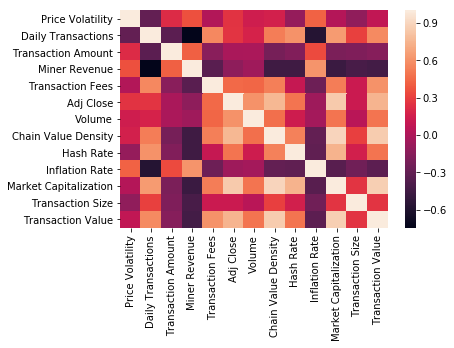

In [37]:
sns.heatmap(data_normfeat.iloc[:,1:].corr())